![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("Churn_Modelling.csv")

In [10]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [32]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [37]:
### 3.2 Preparação e limpeza dos dados

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [52]:
conda install py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Tapps\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB
    libxgboost-1.3.3           |       hd77b12b_0         1.3 MB
    py-xgboost-1.3.3           |   py38haa95532_0         139 KB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  pkgs/main/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         pkgs/main/win-64::libxgboost-1.3.3-hd77b12b_0
  py-xgboost         pkgs/main/win-64::py-xgboost-1.3.3-py38haa95532_0




_py-xgboost-mutex-2. | 12 KB     |            |   0% 
_py-xgboost-mutex-2. | 12 KB     | ########## | 100% 
_py-xgboost

In [53]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Tapps\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_0         3.1 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    xgboost-1.3.3              |   py38haa95532_0          23 KB
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38
  xgboost            pkgs/main/win-64::xgboost-1.3.3-py38haa95532_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.10.3-py38haa244

In [15]:
features_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
binary_features = ["HasCrCard", "IsActiveMember"]
target = "Exited"

In [38]:
x = df[features_to_scale + binary_features]
y = df[target]

In [46]:
df = pd.concat((df.loc[df["Exited"]==1], df.loc[df["Exited"]==0].sample(2037, replace=False)),axis=0).reset_index(drop=True)

In [42]:
df.loc[df["Exited"]==0].sample(2037, replace=False)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5058,5059,15682322,Aksenov,714,France,Male,37,9,148466.93,2,0,1,151280.96,0
2963,2964,15718071,Tuan,655,France,Female,51,3,0.00,2,0,1,15801.02,0
9889,9890,15711489,Azikiwe,760,Spain,Female,32,2,0.00,1,1,1,114565.35,0
3453,3454,15737521,Ball,619,Germany,Male,40,9,103604.31,2,0,0,140947.05,0
3335,3336,15660735,T'ang,581,Spain,Female,31,6,0.00,2,1,0,188377.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6484,6485,15668629,Saunders,719,Spain,Male,44,2,0.00,2,1,0,196582.19,0
7903,7904,15618437,Singleton,567,Spain,Male,34,10,0.00,2,0,1,161571.79,0
6893,6894,15657540,Cremonesi,578,France,Male,50,5,151215.34,2,1,0,169804.40,0
2730,2731,15730339,Bell,670,Spain,Male,30,3,133446.34,1,0,0,3154.95,0


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=y,random_state=12345)

In [18]:
scaler = StandardScaler()
scaler.fit(x_train[features_to_scale])
x_scaled_train = pd.DataFrame(scaler.transform(x_train[features_to_scale]), columns=features_to_scale)
x_scaled_test = pd.DataFrame(scaler.transform(x_test[features_to_scale]), columns=features_to_scale)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [19]:
x_scaled_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,-0.061427,0.106098,-0.353942,0.010530,0.805878,0.267707
1,-0.443298,-1.139433,-0.006983,0.388533,-0.911497,-1.612531
2,-0.525865,0.680958,0.686936,0.082043,0.805878,-0.297533
3,-0.185277,-0.085522,0.339977,0.159218,0.805878,-0.040122
4,-2.280406,2.022299,0.686936,-1.224906,0.805878,1.100176
...,...,...,...,...,...,...
7995,-1.361852,0.201908,-0.006983,0.543826,-0.911497,-0.192448
7996,-1.176077,0.489338,-0.353942,0.724078,-0.911497,0.532043
7997,0.826165,0.010288,-1.394820,0.638360,-0.911497,0.787086
7998,1.032581,-0.660383,-0.006983,-1.224906,0.805878,-0.083220


In [20]:
x_train_scaled = pd.concat((x_scaled_train, x_train[binary_features].reset_index(drop=True)), axis=1)
x_test_scaled = pd.concat((x_scaled_test, x_test[binary_features].reset_index(drop=True)), axis=1)

### 3.2 Preparação e limpeza dos dados

### 3.3 Seleção de atributos

In [23]:
# seu código

In [24]:
# seu código

### 3.4 Construção do modelo

In [25]:
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [119]:
!pip install scikit-plot

In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
clf = RandomForestClassifier()

In [57]:
clf.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [59]:
y_pred = clf.predict(x_test_scaled)
y_pred_train = clf.predict(x_train)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.42      0.54       407

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



In [61]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.26      0.40      6370
           1       0.21      0.76      0.33      1630

    accuracy                           0.37      8000
   macro avg       0.51      0.51      0.36      8000
weighted avg       0.69      0.37      0.39      8000



### 3.5 Avaliação do modelo

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

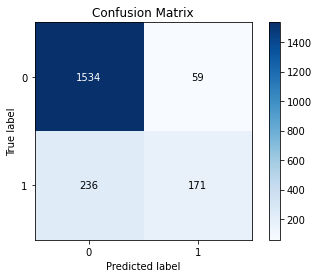

In [62]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
# seu código

### 3.4 Otimização do modelo

In [ ]:
# seu código

In [ ]:
# seu código

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.